<a href="https://colab.research.google.com/github/anasalek/Pyhton_hw/blob/main/Shibaeva_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`machine learning course 2025 (с) mssvctr`

### Домашнее задание 1

**Titanic challenge** - самое известное соревнование по Data Science

Используйте данные о пассажирах Титаника, чтобы построить свой классификатор, который предсказывает вероятность гибели пассажира на печально известном корабле

#### Шаг 1: импорт библиотек

Заполните плейсхолдеры

In [2]:
# импортируйте pandas, numpy, seaborn и matplotlib
# не забывайте о том, что каждая из этих библиотек
# использует свои сокращения

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# далее мы импортируем миллион методов из scikit-learn
# эта часть уже выполнена, ура!

from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import StandardScaler, LabelEncoder
# измененяет размер распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1.
# Encode target labels with value between 0 and n_classes-1.
from sklearn.impute import SimpleImputer # Replace missing values using a descriptive statistic (e.g. mean, median, or most frequent) along each column, or using a constant value.
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # модуль naive_bayes
# GaussianNB: Это класс, реализующий алгоритм наивного байесовского классификатора, основанный на предположении, что данные в каждом классе распределены по нормальному (гауссовскому) закону.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# accuracy score возвращает 1, если точно прогнозирует, 0 - если нет


#### Шаг 2: загружаем данные с Титаника

In [3]:
# выгрузим датасет напрямую с URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# выведите первые 5 строк датасета
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Шаг 3: анализ данных

Опишите данные и укажите в комментариях к коду ответы на вопросы:

1. выведите df.info()
  - в каких столбцах есть NaN'ы?
  - ориентируясь на количество NaN'ов в столбцах, определите, какие строки "не жалко" выбросить, а какие лучше сохранить
2. визуализируйте распределение классов по столбцу `Survived`
  - сбалансировали ли классы в нашем датасете?
3. выведите список столбцов, в которых представлены категориальные данные
  - почему категориальные данные нужно будет обработать перед запуском обучения модели?

In [4]:
df.info()
# ну будто бы данных о cabin мало (204 из 891 не NaN), остальные достаточно полные, я бы не стала выбрасывать.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

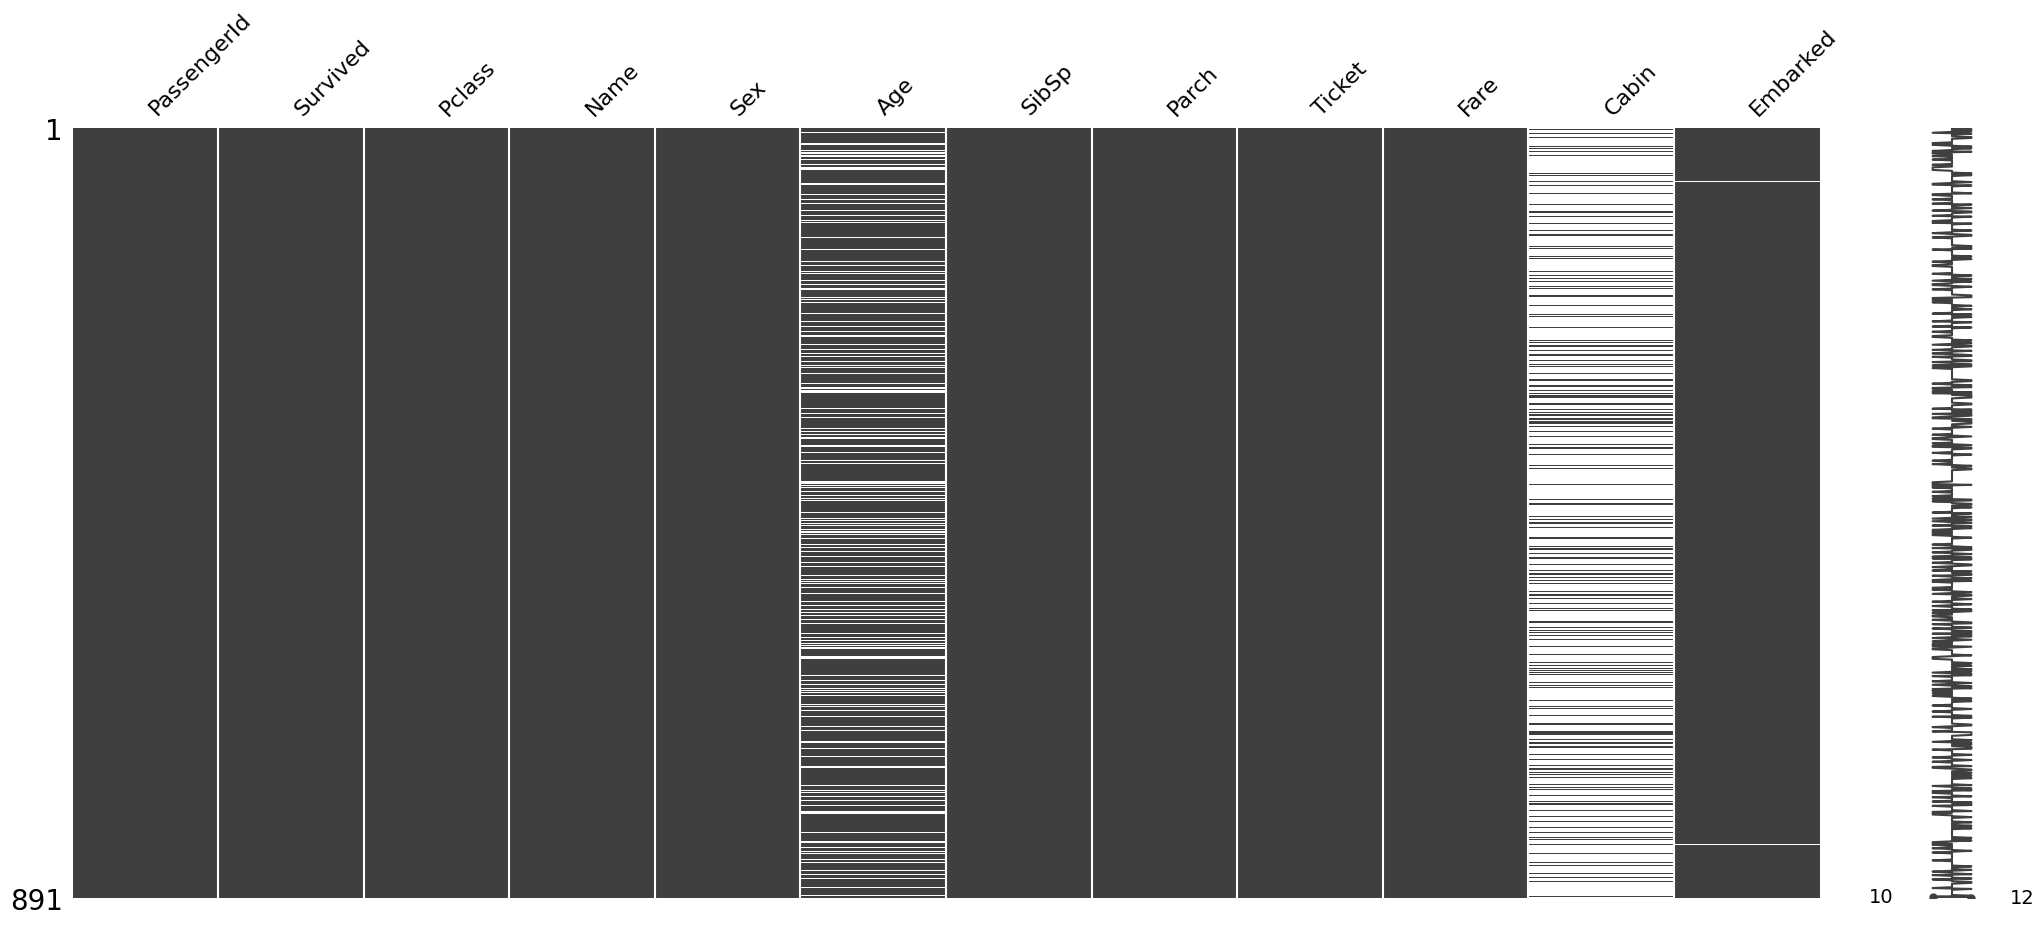

In [5]:
# чтобы NaNы были нагляднее, я нашла это
import missingno as msno
msno.matrix(df)

# здесь видно, что cabin точно мало что даст. Но возраст я бы оставила, потому что предполагаю, что там старались спасать детей...

<Axes: >

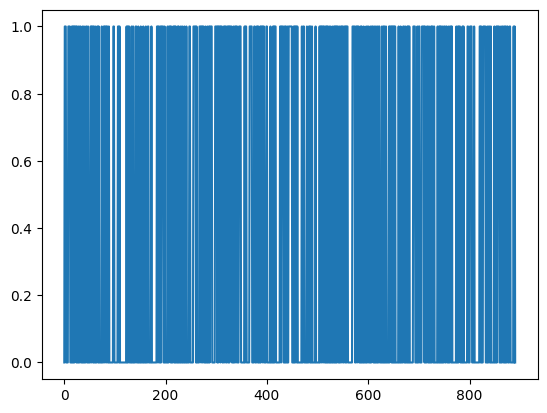

In [6]:
df['Survived'].plot()
#df['Survived'].iloc[100:150] # это я увидела большой пробел на графике и решила убедиться, что пусототы это 0

# если синий это выжившие, то есть очень большой перевес в данных

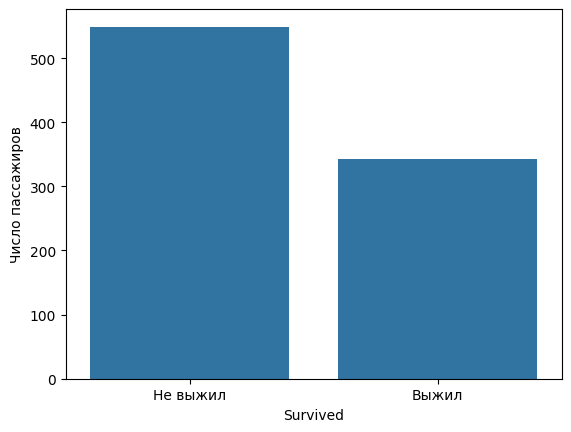

In [7]:
# ну или так
sns.countplot(x='Survived', data=df)
plt.ylabel('Число пассажиров')
plt.xticks([0, 1], ['Не выжил', 'Выжил'])
plt.show()

Axes(0.125,0.11;0.775x0.77)


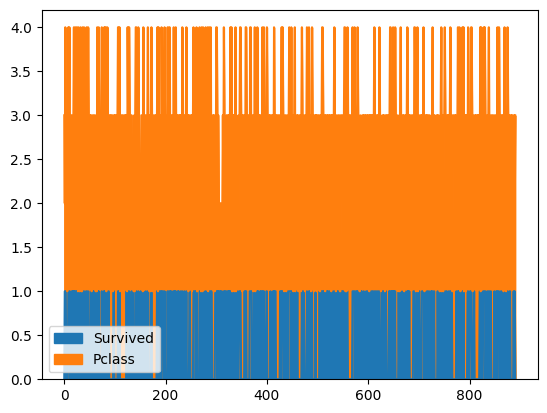

In [8]:
# тут нет данных типа 'category', а int и object не соответствуют тем категориальным данным, которые я вижу глазами: пол, факт выживания и класс. Такак что я не знаю, как их вывести автоматически
categorical_columns = df[['Sex','Survived','Pclass']]
#print(categorical_columns)
print(categorical_columns.plot(kind='area'))

#### Шаг 4: анализ данных

Ответы на эти вопросы помогут вам принять решения для препроцессинга данных:

- требуется ли балансировка классов?
- какие столбцы нужно дропнуть?
- какие данные нужно преобразовать к виду числовых?

In [9]:
# если балансировка классов это урезание выживших или дозаполнение датасета предсказанными средними значениями "невыживших", то, мне кажется, не надо. работаем с тем, что есть
# ну или я не поняла, что значит "балансировка классов"

# категориальные данные лучше преобразовать в числа. Survived и Pclass и так в числах, остался только Sex.

# дропну столбцы, которые не дадут предсказаний: Cabin, Ticket, Fare, Embarked

**Дропаем столбцы**

Оставим классы в покое и сразу перейдем к очистке таблицы

Есть два пути:

- дропнуть "лишние" столбцы из исходной таблицы
- создать новую таблицу, в которую мы занесем только "нужные" столбцы

Выберите любой способ и создайте новый датафрейм, очищенный от неинформативных столбцов, в которых много NaN'ов

In [10]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
daf = df.drop(columns=['Cabin', 'Ticket', 'Fare', 'Embarked']) # дропнула
daf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0


In [12]:
"""
ПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ
"""

'\nПРИМЕР ОЧИЩЕННОЙ ТАБЛИЦЫ\n'

**Categorical --> Numerical**

Для преобразования категориальных данных к виду чисел, в sklearn используется метод `LabelEncoder`

- документация [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

Метод автоматически заменяет категориальные метки на целые числа

In [13]:
# образец кодирования столбца 'Sex' с LabelEncoder
daf['Sex'] = LabelEncoder().fit_transform(df['Sex'])  # 0 = female, 1 = male
daf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0


Рассмотрим еще один метод: мы имитируем one-hot encoding с помощью метода `get_dummies` из Pandas

- [документация метода](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

Принцип работы one-hot-encoding:

- как мы закодируем цифры 1 и 9, чтобы получить разреженный массив?
- создаем матрицу из двух векторов размерностью 10
  ```
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] # цифра 1
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1] # цифра 9
  ```
- единица означает позицию цифры в ряде `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`
- также:
  - единица означает `True` (число находится в этой позиции)
  - ноль означает `False` (число не находится в этой позиции)

При использовании этого метода в датафреймах, мы также создаем три новых столбца (три новых вектора), в которых помечаем `True` соответствие данной метке

In [14]:
# образец кодирования столбца 'Embarked' с get_dummies
# в Embarked у нас три метки: C, Q, S
# метки означают станцию посадки данного пассажира

# это я пол так сделала, не очень удобно
dof = pd.get_dummies(df, columns=['Sex'])  # one-hot encoding
dof.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,False,True


Теперь обновите ваш датафрейм: замените с использованием изученных методов категориальные данные на числовые

Изучите документацию и найдите дополнительные материалы, ответьте на вопрос: чем `LabelEncoder` отличается от `get_dummies` и когда какой метод лучше использовать?

In [15]:
# one-hot-encoding с get_dummies подходит когда вариантов больше, чем два. Пола всего два, там 0 и 1 прекрасно работают в одном столбце.
# А станций три, пусть будет True в одной из станций, чем число 1, 2, 3... Ну еще я прочитала, что лейблы, которые присуждает LabelEncoder, например, 0, 1, 2, 3, при обучении
# моделей могут заставить модель ошибочно думать, что это разные по величине значения, а не просто ярлык-обозначение категории.

**Заполняем пропуски**

Мы убрали лишние столбцы, но NaN'ы по-прежнему есть в нашем датафрейме

Рассмотрим метод `SimpleImputer` из sklearn для заполнения пропусков в данных

- [документация SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html)

In [16]:
# заполняем пропуски в столбце Age
imputer = SimpleImputer(strategy="mean")
daf['Age'] = imputer.fit_transform(daf[['Age']])

Изучите документацию sklearn и ответьте на вопросы: какие стратегии доступы для работы с методом SimpleImputer? Чем они отличаются? Какие стратегии подойдут для работы с категориальными данными?

**Отвечаю**

Есть стратегии mean, median, most_frequent и constant. Первые два можно использовать только с числовыми данными, а последние два и с числовыми, и с категориальными. Mean заменяет NaNы на среднее значение, median на медиану, most_frequent на самое частотное (поэтому строку тоже можно), а constant заменяет NaNы с помощью параметра fill_value. Еще на месте стратегии можно указать свою функцию (? Callable).

**Feature Engineering**

> Данные - это пища для вашей модели

Слишком шумные данные вызовут отравление модели (кстати, один из методов киберпреступности, построенный на работе с данными, так и называется - data poisoning!)

Недостаточность в данных может стать причиной недообучения (underfitting), поэтому мы можем не только дропать, но и добавлять фичи, т.е. признаки, на которых будет учиться наша модель

Этот процесс называется **feature engineering**

In [17]:
# Добавим фичу Family size = SibSp + Parch + 1 (единица обозначает самого пассажира)
daf['FamilySize'] = daf['SibSp'] + daf['Parch'] + 1

# Фича Alone для тех, кто путешествует один
daf['IsAlone'] = (daf['FamilySize'] == 1).astype(int)

daf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,2,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,1,1


Добавьте любую новую фичу в датафрейм, которая легко выводится из данных

Например, можно вытащить обращения к пассажирам из столбца `Name` из исходной таблицы: `Mr., Mrs., Dr.`

Для этого изучите внимательно данные, познакомьтесь с описанием датасета на Kaggle

- https://www.kaggle.com/c/titanic/

Вам нужно самостоятельно решить, что можно извлечь из этих данных, как назвать новую фичу и избавиться от категориальных меток

In [18]:
daf['IsChild'] = daf['Age'] < 18
daf['IsChild'] = LabelEncoder().fit_transform(daf['IsChild'])
daf[10:50]
# фича IsChild, потому что я хочу посмотреть, что стало с детьми. Их больше спасали или наборот их больше погибло

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,FamilySize,IsAlone,IsChild
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.000000,1,1,3,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.000000,0,0,1,1,0
12,13,0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,1,1,0
13,14,0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,7,0,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",0,14.000000,0,0,1,1,1
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",0,55.000000,0,0,1,1,0
16,17,0,3,"Rice, Master. Eugene",1,2.000000,4,1,6,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,29.699118,0,0,1,1,0
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,31.000000,1,0,2,0,0
19,20,1,3,"Masselmani, Mrs. Fatima",0,29.699118,0,0,1,1,0


In [19]:
# фича по званию, ну мало ли
import re
def title(name):
  '''
  Ищет одно из этих званий и, если находит,
  добавялет в столбец TITLE
  '''
  title_search = re.search(r'Master\.|Dr\.|Rev\.|Don\.|Major\.|Colonel\.|Captain\.', name)
  return title_search.group(0) if title_search else 'Unknown'

daf['Title'] = daf['Name'].apply(title)

In [64]:
daf[10:30]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,IsAlone,IsChild,Title
10,11,1,3,0,4.000000,1,1,3,0,1,1
11,12,1,1,0,58.000000,0,0,1,1,0,1
12,13,0,3,1,20.000000,0,0,1,1,0,1
13,14,0,3,1,39.000000,1,5,7,0,0,1
14,15,0,3,0,14.000000,0,0,1,1,1,1
15,16,1,2,0,55.000000,0,0,1,1,0,1
16,17,0,3,1,2.000000,4,1,6,0,1,0
17,18,1,2,1,29.699118,0,0,1,1,0,1
18,19,0,3,0,31.000000,1,0,2,0,0,1
19,20,1,3,0,29.699118,0,0,1,1,0,1


In [21]:
# Я не стала делить людей со званием, потому что их и так мало, вряд ли случайные спасенные что-то дадут.
def silly_counter():
  '''
  Считает сколько Mr. Miss (Ноунеймы) и сколько с каким-то званием
  '''
  counter = 0
  other_counter = 0
  for line in daf['Title']:
    if line == "Unknown":
      counter += 1
    else:
      other_counter +=1
  return (f'Ноунеймы: {counter}, Крутые: {other_counter}')

silly_counter()

'Ноунеймы: 835, Крутые: 56'

In [22]:
# вон как их мало
value_counts = daf['Title'].value_counts()
value_counts

,count
Title,
Unknown,835
Master.,40
Dr.,7
Rev.,6
Major.,2
Don.,1


In [23]:
# теперь избавлюсь от категориальных данных
# имя можно дропнуть, когда я вытащила из него фичу title: 1 - ты никто, 0 - есть звание
daf = daf.drop(columns=['Name'])

In [24]:
# Объединила всех персон со званиями в одно
daf['Title'] = daf['Title'].apply(lambda x: 'Titled' if x != "Unknown" else x)

In [25]:
# теперь превращаем title в числовые данные, я сделаю это с Labelencoder, потому что мне нравится, когда все в одном столбце))
daf['Title'] = LabelEncoder().fit_transform(daf['Title'])

In [26]:
daf[10:30]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,FamilySize,IsAlone,IsChild,Title
10,11,1,3,0,4.000000,1,1,3,0,1,1
11,12,1,1,0,58.000000,0,0,1,1,0,1
12,13,0,3,1,20.000000,0,0,1,1,0,1
13,14,0,3,1,39.000000,1,5,7,0,0,1
14,15,0,3,0,14.000000,0,0,1,1,1,1
15,16,1,2,0,55.000000,0,0,1,1,0,1
16,17,0,3,1,2.000000,4,1,6,0,1,0
17,18,1,2,1,29.699118,0,0,1,1,0,1
18,19,0,3,0,31.000000,1,0,2,0,0,1
19,20,1,3,0,29.699118,0,0,1,1,0,1


#### Шаг 4: обучение

Создаем пары `data - label`

In [27]:
X = daf.drop(columns=['Survived']) # данные = все столбцы кроме метки Survived
y = daf['Survived'] # метки = только столбец Survived

Вспомните прошлое занятие: примените метод `train_test_split`

Создайте 2 выборки данных в соотношении 80 на 20

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Изучите информацию о том, как работает логистическая регрессия и ответьте на вопрос: какую роль играет `StandardScaler` в работе с логистической регрессией?

**Отвечаю**

Логистическая регрессия похожа на линейную, но позволяет присваивать один из классов на основе вероятностей. Как я поняла, это линейная регрессия, пропущенная через сигмоиду, все значения которой располагаются между 0 и 1 для удобства. Класс 0 присваивается значениям ближе к 0, а класс 1 - значениям ближе к 1. StandardScaler как раз и преобразует значения к виду от 0 до 1.

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Обучение, как и в случае работы с линейной регрессией, займет всего пару строк

Опишите основной принцип работы логистической регрессии своими словами (2-3 предложения достаточно)

Предварительно изучите материал: https://web.stanford.edu/~jurafsky/slp3/5.pdf

In [30]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

# предсказания
y_pred_log = log_reg.predict(X_test_scaled)

# вывод репорта
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

Logistic Regression Performance:
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [121]:
# создам персонажа, которого надо запредиктить
data = {'PassengerId': [15],
        'Pclass': [2],
        'Sex': [1],
        'Age': [5],
        'SibSp': [3],
        'Parch': [0],
        'FamilySize': [4],
        'IsAlone': [0],
        'IsChild': [1],
        'Title': [1]}

pddata = pd.DataFrame(data)

In [122]:
# знаете, что сильнее всего влияет на предсказание? PassengerId. Я что, шутка для него?
unfortunate_soul = log_reg.predict(pddata)
print(unfortunate_soul)

[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Повторим магию и обучим наивные байесовский классификатор. Что значит `Gaussian` в названии метода `GaussianNB`? Изучите документацию метода, чтобы ответить на этот вопрос

Почему для этого метода не нужен StandardScaler?

Байесовский классификатор классифицирует штуки, основываясь на 2 принципах: признаки независимы друг от друга (поэтому наивный) и имеют гауссовское (нормальное) распеделение, поэтому 'Gaussian'. Этот метод рассчитывает вероятности по формуле,

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naïve Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naïve Bayes Performance:
Accuracy: 0.7821229050279329
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       105
           1       0.71      0.81      0.75        74

    accuracy                           0.78       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.78      0.78       179



In [124]:
pddata

,PassengerId,Pclass,Sex,Age,SibSp,Parch,FamilySize,IsAlone,IsChild,Title
0,15,2,1,5,3,0,4,0,1,1


In [123]:
# запредиктим что-нибудь
# меняла возраст, пол, семейное положение, класс - всех предикит на выживание. мб потому что данные с перекосом.
xz = nb.predict(pddata)
print(xz)

[0]


Мы молодцы! Отрисуем результат с помощью матрицы ошибок.
Матрица ошибок используется для оценки производительности классификационной модели.

Расчет метрик

Из матрицы ошибок можно вычислить ряд метрик, таких как:

Точность (Accuracy):

   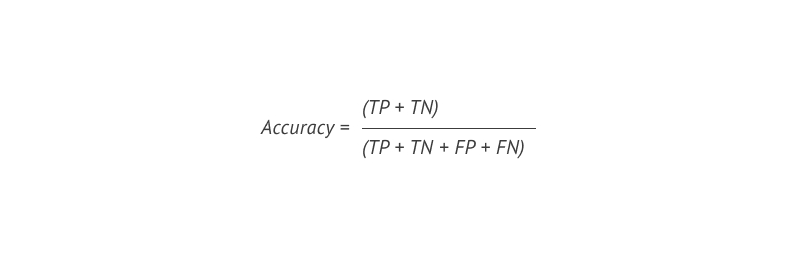

Это общая доля верных предсказаний модели. Все верные T и F : вообще все предсказания.

Полнота (Recall) или Чувствительность (Sensitivity):
Насколько полно модель замечает положительные примеры. T точно предсказанные : T точно предсказанные + T, ошибочно определенные в F

Precision (Точность):
Точно предсказанные T : Точно предсказанные Т + F, ошибочно опереденные в Т. Мера того, насколько точно модель разделяет T и F (насколько склонна захватить лишнее).

   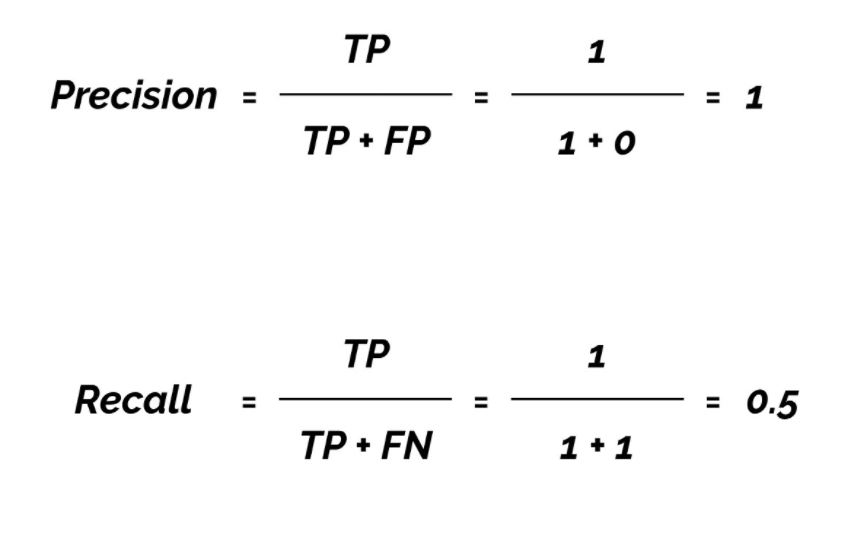


F1-Score: Это гармоническое среднее между точностью и полнотой.
0ef9c82f-2857-446e-918d-5f654b9d9133_Screenshot+(49).avif

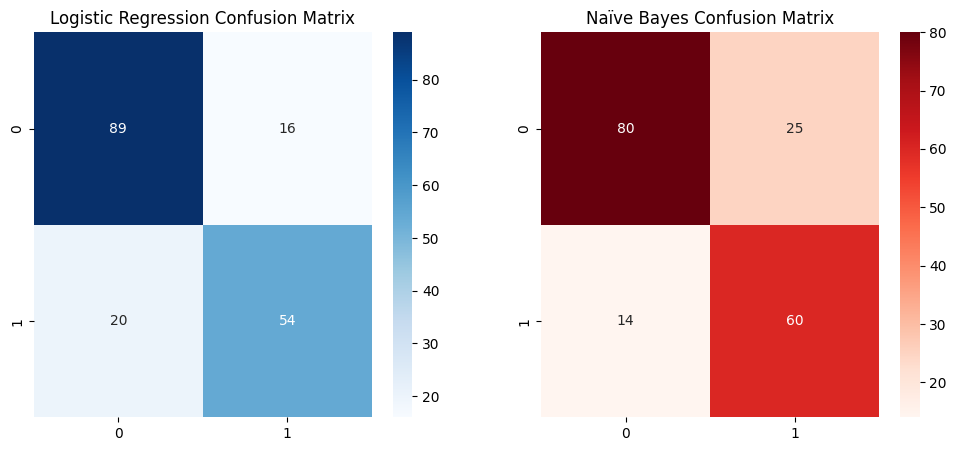

In [35]:
# надеюсь, это оно
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(conf_matrix_log, annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Reds", ax=axes[1])
axes[1].set_title("Naïve Bayes Confusion Matrix")

plt.show()

Господи, а как читать-то это?

1х1 это True Positive (54)?

0x0 True Negative (89)?

Ну выглядит, будто оба достаточно точные... Но не знаю. Чисто визуально, по моим ручным тестам, предсказание выглядело очень рандомно. Но мб это я что-то не так делаю.

In [ ]:
               Предсказание
               1       0
            +-----------------+
         1  |  TP    |  FN   |
  Истина    |-----------------|
         0  |  FP    |  TN   |
            +-----------------+